In [1]:
import pandas as pd
import numpy as np
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

# Analyse des résultats du DNB blanc 1

In [13]:
gene = [str(i) for i in range(301, 305)] + [str(i) for i in range(309, 312)]
pro = [str(i) for i in range(305, 309)] + ["312"]
coeff = {
    "Français": 100,
    "HG": 50,
    "Maths": 100,
    "SVT": 25,
    "Physique": 25,
    "Techno": 25
}
matieres = list(coeff.keys())
norm_matieres = ["_"+m for m in matieres]

In [14]:
sheets_gene = pd.read_excel("./DNB blanc 1.xls",
                            sheetname=gene,
                            skiprows=[0],
                            parse_cols="B,C,E,G,I,K,M",
                           )
sheets_pro = pd.read_excel("./DNB blanc 1.xls",
                           sheetname=pro,
                            header=1,
                            parse_cols="B,C,E,G,I,K,M",
                          )

In [15]:
def orderedDict2df(sheets):
    dfs = []
    for tribe, df in sheets.items():
        df['classe'] = tribe
        dfs.append(df)
    return pd.concat(dfs)

In [16]:
gene_df = orderedDict2df(sheets_gene)
pro_df = orderedDict2df(sheets_pro)

In [17]:
gene_df.head()

Unnamed: 0 Français: /100 HG:  /50 Maths: /100 SVT: /25  \
0     ABDALLAH Faouzia             38       22          28     16.5   
1      ABDALLAH Sarati             49       23          39     11.5   
2   ABDOU SOUFFE Momed             64       41          89       25   
3  ABDOUL-KADER Sinina           61.5       33          52     15.5   
4             ALI Aïda             54       43          50     17.5   

  Phys. :  /25 Techno:  /25 classe  
0           11         11.5    301  
1           15         13.5    301  
2           19         18.5    301  
3           16         18.5    301  
4           14         19.5    301

In [18]:
gene_df.columns = ["Nom", "Français", "HG", "Maths", "SVT", "Physique", "Techno", "Classe"]
gene_df.head()

Nom Français  HG Maths   SVT Physique Techno Classe
0     ABDALLAH Faouzia       38  22    28  16.5       11   11.5    301
1      ABDALLAH Sarati       49  23    39  11.5       15   13.5    301
2   ABDOU SOUFFE Momed       64  41    89    25       19   18.5    301
3  ABDOUL-KADER Sinina     61.5  33    52  15.5       16   18.5    301
4             ALI Aïda       54  43    50  17.5       14   19.5    301

In [20]:
for m, coef in coeff.items():
    gene_df[m] = pd.to_numeric(gene_df[m], errors='coerce')
    gene_df["_"+m] = gene_df[m]/coef
gene_df.head()

Nom  Français    HG  Maths   SVT  Physique  Techno Classe  \
0     ABDALLAH Faouzia      38.0  22.0   28.0  16.5      11.0    11.5    301   
1      ABDALLAH Sarati      49.0  23.0   39.0  11.5      15.0    13.5    301   
2   ABDOU SOUFFE Momed      64.0  41.0   89.0  25.0      19.0    18.5    301   
3  ABDOUL-KADER Sinina      61.5  33.0   52.0  15.5      16.0    18.5    301   
4             ALI Aïda      54.0  43.0   50.0  17.5      14.0    19.5    301   

   _Français   _HG  _Maths  _SVT  _Physique  _Techno  
0      0.380  0.44    0.28  0.66       0.44     0.46  
1      0.490  0.46    0.39  0.46       0.60     0.54  
2      0.640  0.82    0.89  1.00       0.76     0.74  
3      0.615  0.66    0.52  0.62       0.64     0.74  
4      0.540  0.86    0.50  0.70       0.56     0.78

In [22]:
gene_df = gene_df = gene_df.assign(
    total = gene_df[matieres].sum(1),
    maximum = 325
)
gene_df = gene_df.assign(
    normalisee = gene_df["total"]/gene_df["maximum"]
)

In [23]:
gene_df.head()

Nom  Français    HG  Maths   SVT  Physique  Techno Classe  \
0     ABDALLAH Faouzia      38.0  22.0   28.0  16.5      11.0    11.5    301   
1      ABDALLAH Sarati      49.0  23.0   39.0  11.5      15.0    13.5    301   
2   ABDOU SOUFFE Momed      64.0  41.0   89.0  25.0      19.0    18.5    301   
3  ABDOUL-KADER Sinina      61.5  33.0   52.0  15.5      16.0    18.5    301   
4             ALI Aïda      54.0  43.0   50.0  17.5      14.0    19.5    301   

   _Français   _HG  _Maths  _SVT  _Physique  _Techno  maximum  total  \
0      0.380  0.44    0.28  0.66       0.44     0.46      325  127.0   
1      0.490  0.46    0.39  0.46       0.60     0.54      325  151.0   
2      0.640  0.82    0.89  1.00       0.76     0.74      325  256.5   
3      0.615  0.66    0.52  0.62       0.64     0.74      325  196.5   
4      0.540  0.86    0.50  0.70       0.56     0.78      325  198.0   

   normalisee  
0    0.390769  
1    0.464615  
2    0.789231  
3    0.604615  
4    0.609231

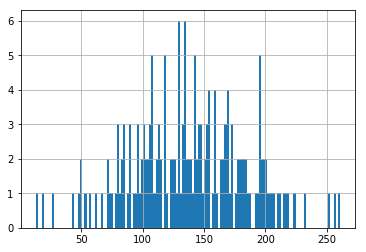

In [24]:
gene_df["total"].hist(bins=150)

In [25]:
gene_df.describe()

Français          HG       Maths         SVT    Physique      Techno  \
count  179.000000  180.000000  179.000000  179.000000  179.000000  179.000000   
mean    45.474860   22.427778   34.597765   12.740223   10.522346   12.709497   
std     15.803416    9.165170   17.255359    5.063457    4.919812    5.013686   
min      2.000000    0.000000    1.000000    2.000000    2.000000    2.500000   
25%     37.250000   14.750000   23.000000    9.000000    6.000000    8.500000   
50%     47.000000   22.500000   30.000000   12.000000   10.000000   12.500000   
75%     55.250000   28.250000   42.500000   16.000000   14.000000   16.500000   
max     88.000000   43.000000   90.000000   25.000000   24.000000   23.500000   

        _Français         _HG      _Maths        _SVT   _Physique     _Techno  \
count  179.000000  180.000000  179.000000  179.000000  179.000000  179.000000   
mean     0.454749    0.448556    0.345978    0.509609    0.420894    0.508380   
std      0.158034    0.183303    0.172554    0.202538    0.196792    0.200547   
min      0.020000    0.000000    0.010000    0.080000    0.080000    0.100000   
25%      0.372500    0.295000    0.230000    0.360000    0.240000    0.340000   
50%      0.470000    0.450000    0.300000    0.480000    0.400000    0.500000   
75%      0.552500    0.565000    0.425000    0.640000    0.560000    0.660000   
max      0.880000    0.860000    0.900000    1.000000    0.960000    0.940000   

       maximum       total  normalisee  
count    188.0  180.000000  180.000000  
mean     325.0  137.827778    0.424085  
std        0.0   46.713537    0.143734  
min      325.0   13.000000    0.040000  
25%      325.0  106.000000    0.326154  
50%      325.0  136.000000    0.418462  
75%      325.0  169.500000    0.521538  
max      325.0  261.000000    0.803077

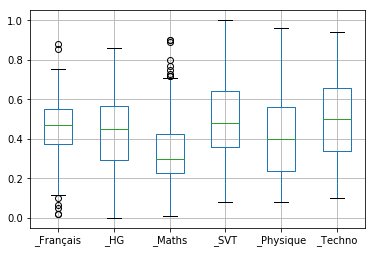

In [26]:
gene_df[norm_matieres].boxplot()

In [27]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd705b06c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd704768908>]], dtype=object)

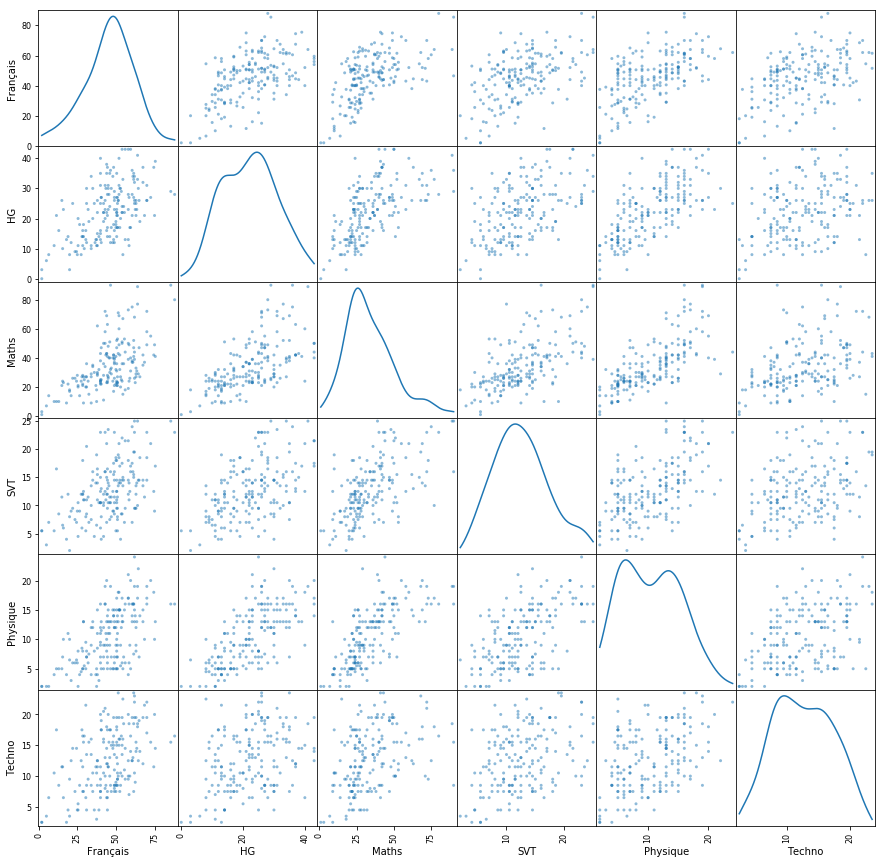

In [31]:
scatter_matrix(gene_df[matieres], alpha=0.5, figsize=(15, 15), diagonal='kde')